# <font color=blue>Assignments for "Logistic Regression"</font>

- In this assignment, you are going to use your model to predict survival of the Titanic disaster. For this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.
    - Download [Titanic](https://www.kaggle.com/c/titanic/data) data from Kaggle. The data in the train.csv file meets your need.
    - Split your data into training and test sets.
    - Predict the survival based on the test data you split by creating your model.
    - Is your model's performance satisfactory? Explain.
    - Try to improve your model's performance by adding or subtracting some variables. <br>

- Explore the advantages and disadvantages of Logistic Regression and discuss with your mentor.

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression


In [2]:
pd.set_option('display.max_columns', 500)
df = pd.read_csv('/Users/melisademir/Desktop/Reg_Assign_1/Class_Assign_1/tit_train.csv', encoding="ISO-8859-1", low_memory=False)
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# missing values

In [4]:
display(df.isnull().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [5]:
df.dropna(subset=["Embarked"],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [7]:
df['Cabin'].fillna(value='Unknown', inplace=True)
df['Age'] = df['Age'].apply(lambda x: np.random.randint(16,50) if (np.isnan(x)) else x)

In [8]:
display(df.isnull().sum().sort_values(ascending=False))

Embarked       0
Cabin          0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,44.0,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


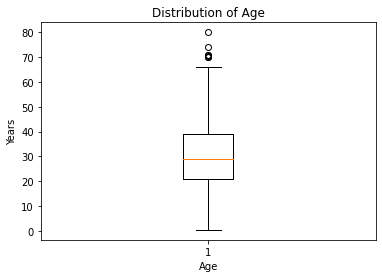

In [10]:
plt.boxplot([df['Age'].dropna(axis=0)]) # drop missing values otherwise it will not work
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Years');

In [11]:
q_1, q_3 = np.percentile(df['Age'].dropna(axis=0), [25, 75])
IQR = q_3 - q_1
upper_bound = q_3 + (1.5 * IQR)
age_outliers = df[df['Age'] > upper_bound]
age_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Unknown,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,Unknown,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,Unknown,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,Unknown,S


### One vs Rest Method

In [12]:
X = df[['Age', 'SibSp', 'Parch', 'Fare']]
y = df.Survived


In [13]:
log_reg = LogisticRegression()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [15]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [16]:
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print('One-vs.-Rest', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.70
Accuracy on Test Data  : 0.62


In [17]:
log_reg_mnm = LogisticRegression(multi_class='ovr', solver='lbfgs')
log_reg_mnm.fit(X_train, y_train)

train_accuracy = log_reg_mnm.score(X_train, y_train)
test_accuracy = log_reg_mnm.score(X_test, y_test)

print('Multinomial (Softmax)', '-'*20, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Multinomial (Softmax)
--------------------
Accuracy on Train Data : 0.70
Accuracy on Test Data  : 0.62


In [18]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train, y_train)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train, y_train),
                                              'Test Accuracy': lr.score(X_test, y_test)
                                             }, ignore_index=True)
display(accuracy_values) 

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.691983,0.606742
1,0.010,0.704641,0.617978
2,0.100,0.700422,0.623596
3,1.000,0.700422,0.623596
4,10.000,0.700422,0.623596
5,100.000,0.700422,0.623596
6,1000.000,0.700422,0.623596
